#  Booking Project - Adepoju Ibrahim Isola

In [1]:
# import the necessaries modulus

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data

data = pd.read_csv('SHG_Booking_Data.csv')

In [3]:
data.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Unnamed: 17
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,$0.00,Check-Out,2015-07-01,0,$0.00,$0.00,NaN
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,$0.00,Check-Out,2015-07-01,0,$0.00,$0.00,NaN
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,$75.00,Check-Out,2015-07-02,0,$75.00,$0.00,NaN
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,$75.00,Check-Out,2015-07-02,0,$75.00,$0.00,NaN
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,$98.00,Check-Out,2015-07-03,0,$196.00,$0.00,NaN


In [4]:
# Sanity data check

#checking the shape

data.shape

(119390, 18)

In [5]:
# checking the info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Booking ID            119390 non-null  int64  
 1   Hotel                 119390 non-null  object 
 2   Booking Date          119390 non-null  object 
 3   Arrival Date          119390 non-null  object 
 4   Lead Time             119390 non-null  int64  
 5   Nights                119390 non-null  int64  
 6   Guests                119390 non-null  int64  
 7   Distribution Channel  119390 non-null  object 
 8   Customer Type         119390 non-null  object 
 9   Country               118902 non-null  object 
 10  Deposit Type          119390 non-null  object 
 11  Avg Daily Rate        119390 non-null  object 
 12  Status                119390 non-null  object 
 13  Status Update         119390 non-null  object 
 14  Cancelled (0/1)       119390 non-null  int64  
 15  

In [6]:
#checking the null values column
data['Unnamed: 17']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: Unnamed: 17, Length: 119390, dtype: float64

In [7]:
# delete the null column

m_data = data.drop('Unnamed: 17', axis = 1)

In [8]:

#checking the dataset again
m_data.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,$0.00,Check-Out,2015-07-01,0,$0.00,$0.00
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,$0.00,Check-Out,2015-07-01,0,$0.00,$0.00
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,$75.00,Check-Out,2015-07-02,0,$75.00,$0.00
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,$75.00,Check-Out,2015-07-02,0,$75.00,$0.00
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,$98.00,Check-Out,2015-07-03,0,$196.00,$0.00


In [9]:
# missing values

m_data.isnull().sum()

Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64

In [10]:
m_data['Country'] = m_data['Country'].fillna('United Kingdom')

In [11]:
m_data['Country']

0               Portugal
1               Portugal
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
119385           Belgium
119386            France
119387           Germany
119388    United Kingdom
119389           Germany
Name: Country, Length: 119390, dtype: object

In [12]:
# recheck the empty values

m_data.isnull().sum()

Booking ID              0
Hotel                   0
Booking Date            0
Arrival Date            0
Lead Time               0
Nights                  0
Guests                  0
Distribution Channel    0
Customer Type           0
Country                 0
Deposit Type            0
Avg Daily Rate          0
Status                  0
Status Update           0
Cancelled (0/1)         0
Revenue                 0
Revenue Loss            0
dtype: int64

# Objective Analysis - Booking patterns

### Question 1: What is the trend in booking patterns over time, and are there specific seasons or months with increased booking activity?

In [13]:
# convert the  Booking date columns to datetime format

m_data['Booking Date'] = pd.to_datetime(m_data['Booking Date'])

In [14]:
# Extract the month and the year from the data
m_data['month'] = m_data['Booking Date'].dt.month
m_data['year'] = m_data['Booking Date'].dt.year

In [15]:
# group the data by month and year , calculate the total booking

booking_trend = m_data.groupby(['year' , 'month'])['Booking ID'].count().reset_index()

In [16]:
booking_trend

,year,month,Booking ID
0,2013,6,1
1,2014,3,1
2,2014,4,4
3,2014,6,2
4,2014,7,3
5,2014,8,5
6,2014,9,18
7,2014,10,2535
8,2014,11,68
9,2015,1,1165


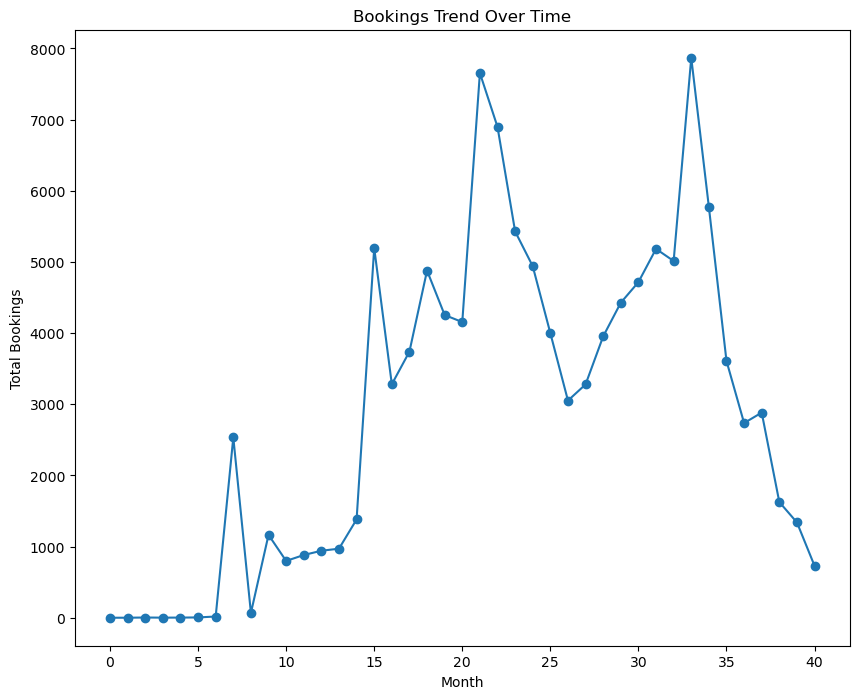

In [17]:
# plot the booking trend over time

plt.figure(figsize=(10,8))
plt.plot(booking_trend['Booking ID'], marker = 'o')
plt.title('Bookings Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Bookings')
plt.show()

### Question 2: How does lead time vary across different booking channels, and is there a correlation between lead time and customer type?

In [18]:
m_data['Arrival Date'] = pd.to_datetime(m_data['Arrival Date'])

In [19]:
# calculate the lead time

m_data['lead_time'] = (m_data['Arrival Date']- m_data['Booking Date']).dt.days

#### Analyze lead Time across Booking channel

In [20]:
# group the data by booking channels and calculate the mean lead time
lead_time_channel = m_data.groupby('Distribution Channel')['lead_time'].mean().reset_index()

In [21]:
lead_time_channel

,Distribution Channel,lead_time
0,Corporate,44.910289
1,Direct,57.829362
2,Offline Travel Agent,135.585261
3,Online Travel Agent,108.248798
4,Undefined,23.000000


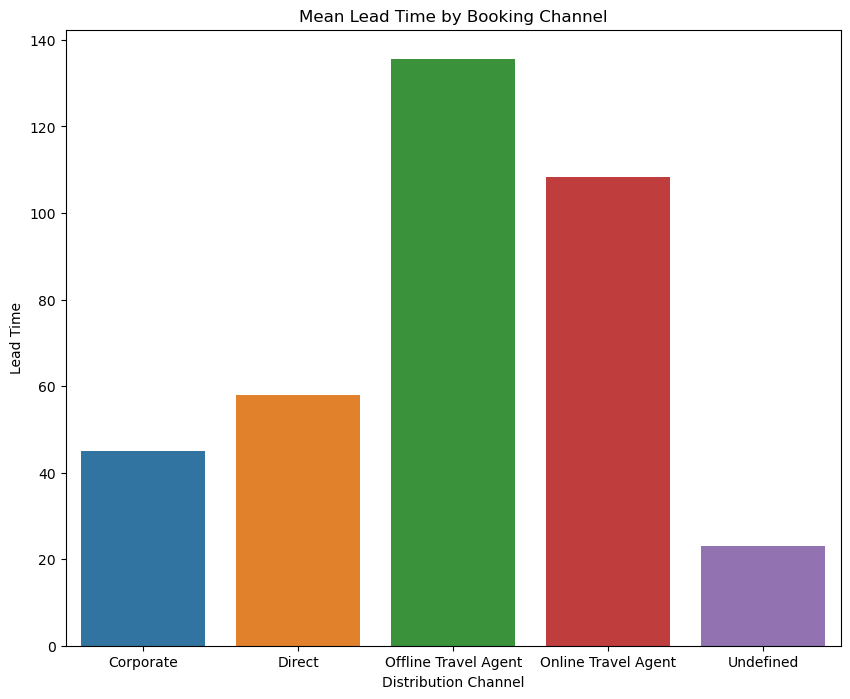

In [22]:
# plot the mean lead time by Distribution channel

plt.figure(figsize =(10, 8))
sns.barplot(x = 'Distribution Channel' , y = 'lead_time', data = lead_time_channel)

plt.title('Mean Lead Time by Booking Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Lead Time')

plt.show()

# Customer Behaviour Analysis

### Question3: Which distribution channels contribute the most to bookings, and how does the average daily rate (ADR) differ across these channels? 

In [23]:
# calculate the total revenue 

m_data['total_revenue'] = m_data['Avg Daily Rate'] * m_data['Nights']

In [24]:
m_data['total_revenue']

0                                                          
1                                                          
2                                                    $75.00
3                                                    $75.00
4                                              $98.00$98.00
                                ...                        
119385           $96.14$96.14$96.14$96.14$96.14$96.14$96.14
119386    $225.43$225.43$225.43$225.43$225.43$225.43$225.43
119387    $157.71$157.71$157.71$157.71$157.71$157.71$157.71
119388    $104.40$104.40$104.40$104.40$104.40$104.40$104.40
119389    $151.20$151.20$151.20$151.20$151.20$151.20$151...
Name: total_revenue, Length: 119390, dtype: object

In [25]:
# group the data by distribution channel and calculate the total booking and revenue

booking_channels = m_data.groupby('Distribution Channel')['Booking ID'].count().reset_index()

In [26]:
booking_channels = booking_channels.merge(m_data.groupby('Distribution Channel')['total_revenue'].sum().reset_index(), on = 'Distribution Channel')

In [27]:
booking_channels

,Distribution Channel,Booking ID,total_revenue
0,Corporate,6677,$75.00$107.42$104.72$104.72$104.72$104.72$100....
1,Direct,14645,$75.00$107.00$107.00$103.00$103.00$153.00$153....
2,Offline Travel Agent,23991,$105.50$105.50$105.50$97.50$97.50$97.50$97.50$...
3,Online Travel Agent,74072,$98.00$98.00$98.00$98.00$82.00$82.00$82.00$123...
4,Undefined,5,$112.70$112.70$112.70$112.70$112.70$12.00$12.0...


In [28]:
# rename the columns 
booking_channels = booking_channels.rename(columns = {'Booking ID' : 'total_bookings'})

In [29]:
booking_channels

,Distribution Channel,total_bookings,total_revenue
0,Corporate,6677,$75.00$107.42$104.72$104.72$104.72$104.72$100....
1,Direct,14645,$75.00$107.00$107.00$103.00$103.00$153.00$153....
2,Offline Travel Agent,23991,$105.50$105.50$105.50$97.50$97.50$97.50$97.50$...
3,Online Travel Agent,74072,$98.00$98.00$98.00$98.00$82.00$82.00$82.00$123...
4,Undefined,5,$112.70$112.70$112.70$112.70$112.70$12.00$12.0...


In [30]:
# sort the data by total bookings in descending order
booking_channels = booking_channels.sort_values(by = 'total_bookings' , ascending = False)

In [31]:
booking_channels

,Distribution Channel,total_bookings,total_revenue
3,Online Travel Agent,74072,$98.00$98.00$98.00$98.00$82.00$82.00$82.00$123...
2,Offline Travel Agent,23991,$105.50$105.50$105.50$97.50$97.50$97.50$97.50$...
1,Direct,14645,$75.00$107.00$107.00$103.00$103.00$153.00$153....
0,Corporate,6677,$75.00$107.42$104.72$104.72$104.72$104.72$100....
4,Undefined,5,$112.70$112.70$112.70$112.70$112.70$12.00$12.0...


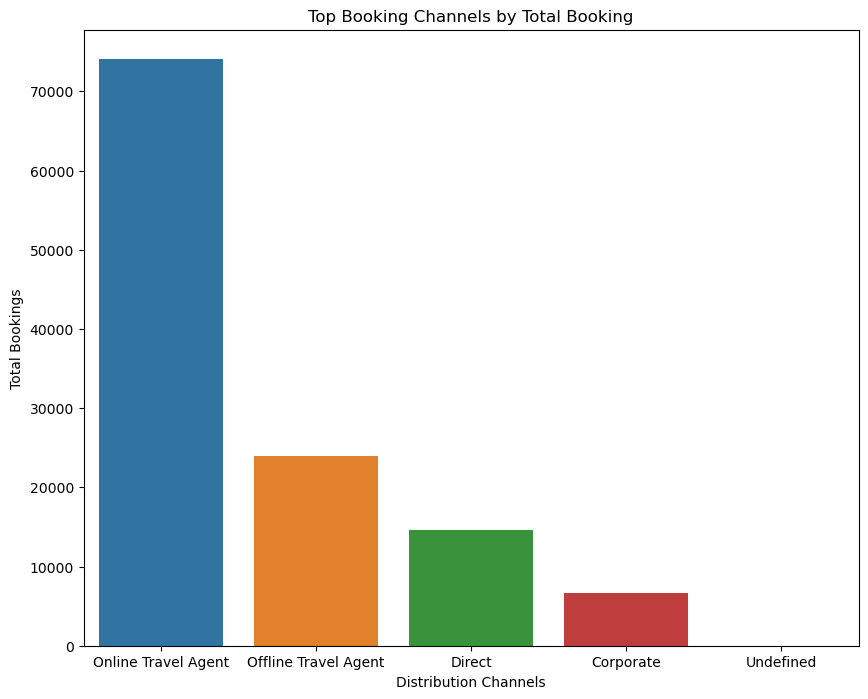

In [32]:
#plot the top distribution channels

plt.figure(figsize= (10,8))
sns.barplot(x= 'Distribution Channel', y = 'total_bookings' , data = booking_channels.nlargest(5, 'total_bookings'))
plt.title('Top Booking Channels by Total Booking')
plt.xlabel('Distribution Channels')
plt.ylabel('Total Bookings')
plt.show()

### Analyze the Average Daily Rate (ADR)



In [33]:
# group the data by Distribution Channels and Calculate the ADR

adr_by_channel = m_data.groupby('Distribution Channel')['Guests'].mean().reset_index()

In [34]:
adr_by_channel

,Distribution Channel,Guests
0,Corporate,1.332335
1,Direct,2.023216
2,Offline Travel Agent,1.856696
3,Online Travel Agent,2.050788
4,Undefined,2.400000


In [35]:
# rename 
adr_by_channel = adr_by_channel.rename(columns={'Guests' : 'adr'})

In [36]:
# sort the data by ADR in descending order
adr_by_channel = adr_by_channel.sort_values(by = 'adr' , ascending = False)

In [37]:
adr_by_channel

,Distribution Channel,adr
4,Undefined,2.400000
3,Online Travel Agent,2.050788
1,Direct,2.023216
2,Offline Travel Agent,1.856696
0,Corporate,1.332335


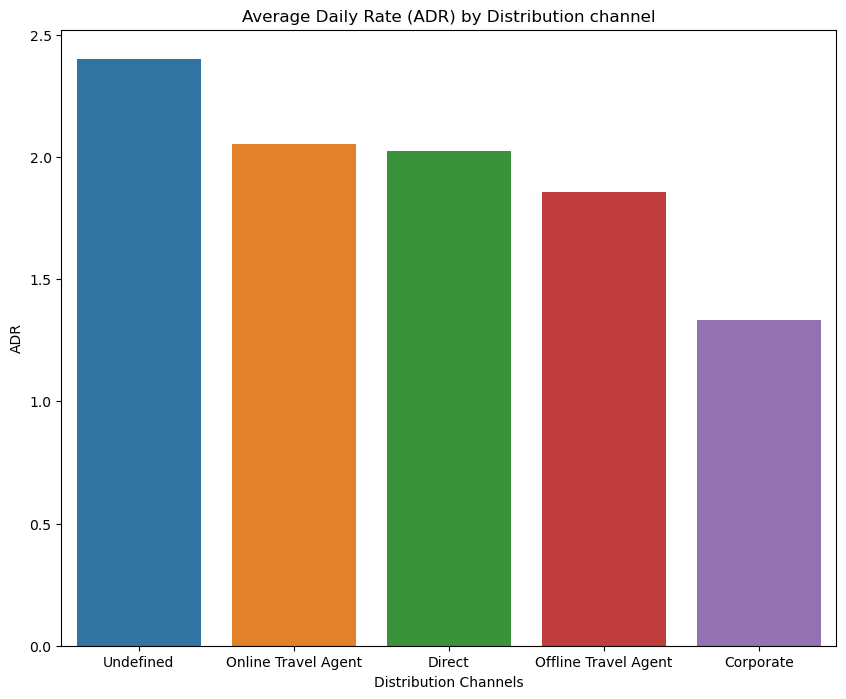

In [38]:
#plot the ADR by distribution channel

plt.figure(figsize= (10,8))
sns.barplot(x= 'Distribution Channel', y = 'adr' , data = adr_by_channel.nlargest(5, 'adr'))
plt.title('Average Daily Rate (ADR) by Distribution channel')
plt.xlabel('Distribution Channels')
plt.ylabel('ADR')
plt.show()

### Question 4: Can we identify any patterns in the distribution of guests based on their country of origin, and how does this impact revenue?

In [39]:
# group the data by country of origin and calculate total number of guests

country_guests = m_data.groupby('Country')['Guests'].count().reset_index()

In [40]:
#rename
country_guests = country_guests.rename(columns = {'Guests':'total_guests'})

In [41]:
country_guests

,Country,total_guests
0,Albania,12
1,Algeria,103
2,American Samoa,1
3,Andorra,7
4,Angola,362
...,...,...
169,Venezuela,26
170,Viet Nam,8
171,Virgin Islands,1
172,Zambia,2


In [42]:
#calculate the revenue by country

country_revenue = m_data.groupby('Country')['Revenue'].count().reset_index()

In [43]:
country_revenue

,Country,Revenue
0,Albania,12
1,Algeria,103
2,American Samoa,1
3,Andorra,7
4,Angola,362
...,...,...
169,Venezuela,26
170,Viet Nam,8
171,Virgin Islands,1
172,Zambia,2


### Analyze  Distribution of Guest by country

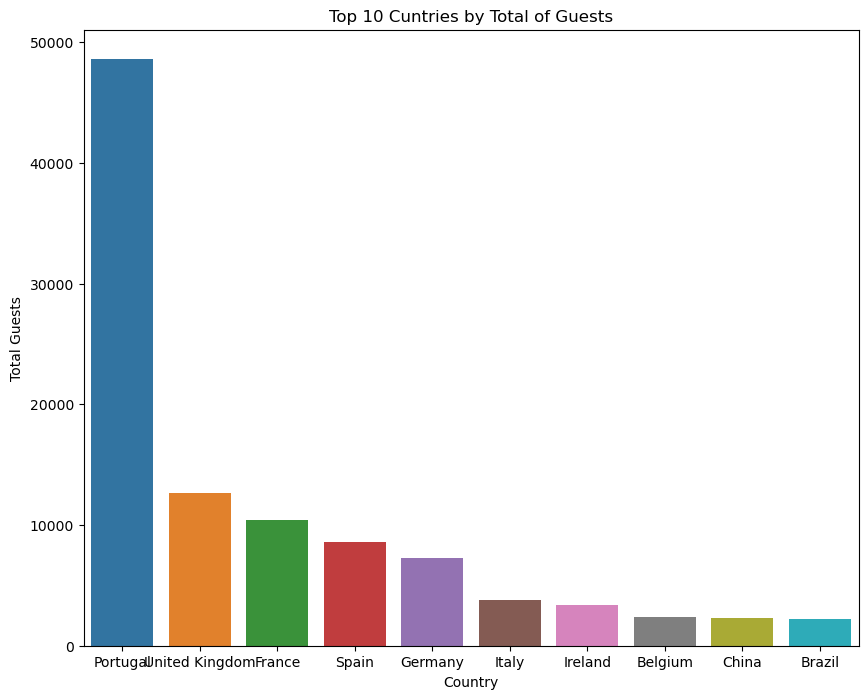

In [44]:
plt.figure(figsize= (10,8))
sns.barplot(x= 'Country', y = 'total_guests' , data = country_guests.nlargest(10, 'total_guests'))
plt.title('Top 10 Cuntries by Total of Guests')
plt.xlabel('Country')
plt.ylabel('Total Guests')
plt.show()

### Analyze of the Revenue by Country

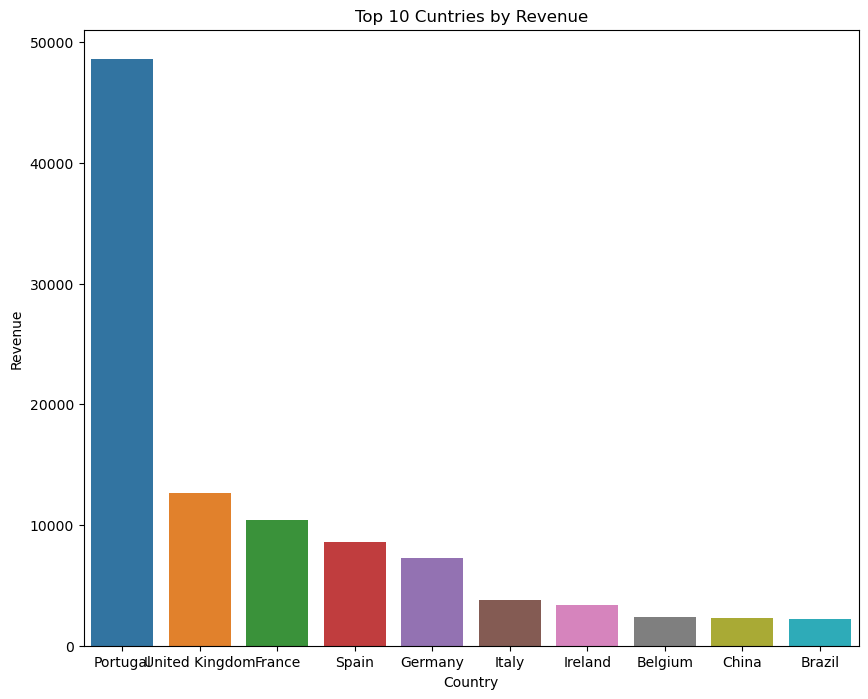

In [45]:
plt.figure(figsize= (10,8))
sns.barplot(x= 'Country', y = 'Revenue' , data = country_revenue.nlargest(10, 'Revenue'))
plt.title('Top 10 Cuntries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

#### Correlate Guests and Revenue by Country

In [46]:
#merge the country_guests and country_revenu of the dataset

country_data = pd.merge(country_guests,country_revenue , on = 'Country')

In [47]:
country_data

,Country,total_guests,Revenue
0,Albania,12,12
1,Algeria,103,103
2,American Samoa,1,1
3,Andorra,7,7
4,Angola,362,362
...,...,...,...
169,Venezuela,26,26
170,Viet Nam,8,8
171,Virgin Islands,1,1
172,Zambia,2,2


In [48]:
#calculate the correlation between the total guests and revenue

correlation = country_data['total_guests'].corr(country_data['Revenue'])

print('Correction between total guests and Revenues : ' ,{correlation})

Correction between total guests and Revenues :  {1.0}


#### - By Adepoju Ibrahim